# How to ace any speed date!
In that time of your life when you begin to date and meet new people it can tend to be a stressful and depressing time for one's life, especially when it comes to speed dating. With this in mind, I wanted to find out what made an individual more likely to be chosen in the speed dating arena, and if one could use this knowledge to their advantage. In order to complete this analysis, one must first look at a dataset collected from one speed dating session. 

Analysis conducted by Morrison Fowlks. 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
fields = data.columns

print('Total number of people that participated (not appear in more than one wave): {}'.format(len(data['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(data.index)))

Total number of people that participated (not appear in more than one wave): 551
Total number of dates occurred: 8378


In [41]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


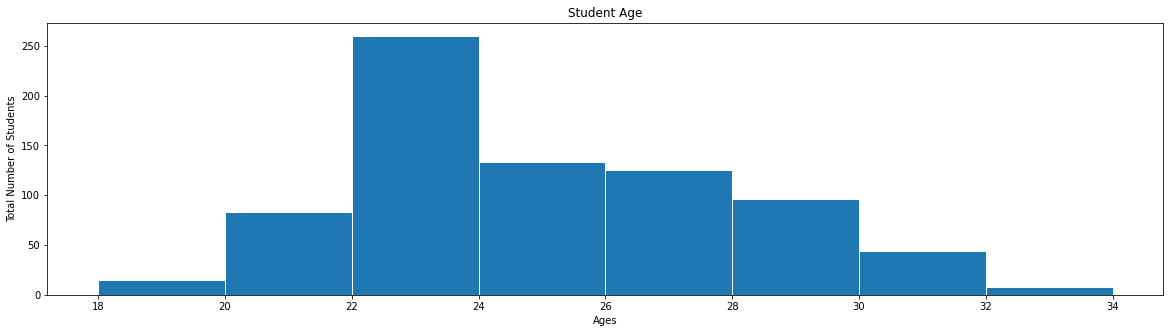

In [42]:
plt.figure(figsize=(20, 5))
plt.title('Student Age')
plt.xlabel('Ages')
plt.ylabel('Total Number of Students')

bins = [18,20,22,24,26,28,30,32,34]

plt.hist(df3.age,bins=bins,edgecolor='white')
plt.show()

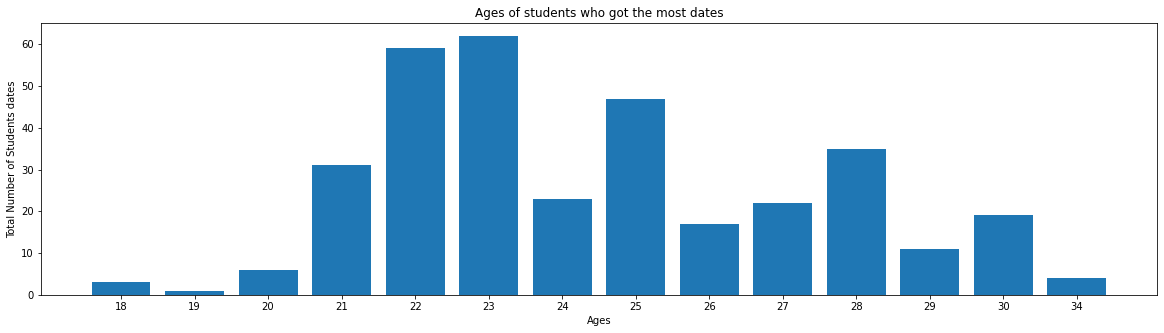

In [43]:
plt.figure(figsize=(20, 5))

plt.title('Ages of students who got the most dates')
plt.ylabel('Total Number of Students dates')
plt.xlabel('Ages')

rage=df3.groupby('age').Decision.sum()

index = ['18','19','20','21','22','23','24','25','26','27','28','29','30','34']
plt.bar(index,rage)
plt.show()

As seen in the given graphs, most students in this speed dating session were in the age range of early 20's to their early 30's. With this in mind, the age groups that had the most dates would be those in their 20's or very early 30's, with the highest dates being taken by 23, 22, and 25 year olds. With this given information, in order to further our analysis we should first clean up our given data. 

In [19]:
pd.options.display.max_columns = None

data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fun night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}
frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}

In [20]:
data.head()

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN

In [33]:
data["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
data["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
data["match"].replace({1:"Yes",0:"No"}, inplace=True)
data["samerace"].replace({1:"Yes",0:"No"},inplace=True)
data["race of partner"].replace(race_replacement, inplace=True)
data["partner's decision"].replace(decision_replacement, inplace=True)
data["field_cd"].replace(field_replacement, inplace=True)
data["race"].replace(race_replacement, inplace=True)
data["career_c"].replace(career_replacement, inplace=True)
data["length"].replace(length_replacement, inplace=True)
data["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
data["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
data["goal"].replace(goal_replacement, inplace=True)
data["frequency of date"].replace(frequency_replacement, inplace=True)
data["go_out"].replace(frequency_replacement, inplace=True)

display(data)

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN

In [22]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)

,missing_values(%),missing_values(numbers)
num_in_3,92.026737,7710
numdat_3,82.143710,6882
date_3,82.119838,6880
expnum,78.515159,6578
sinc7_2,76.665075,6423
...,...,...
wave,0.000000,0
Condition,0.000000,0
idg,0.000000,0
Gender,0.000000,0


In [23]:
print(data.columns.tolist())

['iid', 'id', 'Gender', 'idg', 'Condition', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age of partner', 'race of partner', 'partner stated preference', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', "partner's decision", 'partner rating of attributes', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'median_sat', 'tuition', 'race', 'race importance', 'religion importance', 'originally from', 'zipcode', 'income', 'goal', 'frequency of date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 's

Avgerage dates per male: 15.1		Avgerage dates per female: 15.3
Avgerage male match percentage: 20.3	Avgerage female match percentage: 20.9


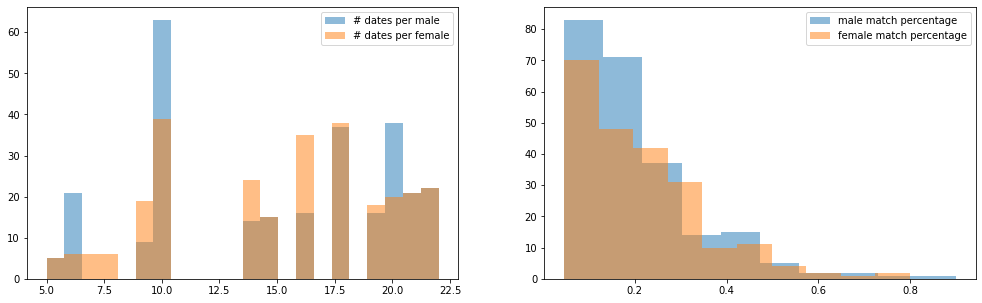

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(17,5))

# dates per person
num_dates_per_male = data[data.Gender == 'Male'].groupby('iid').apply(len)
num_dates_per_female = data[data.Gender == 'Female'].groupby('iid').apply(len)
axes[0].hist(num_dates_per_male, bins=22, alpha=0.5, label='# dates per male')
axes[0].hist(num_dates_per_female, bins=22, alpha=0.5, label='# dates per female')
axes[0].legend(loc='upper right')

# matches per person
matches = data[data.match == "Yes"]
matches_male = matches[matches.Gender == 'Male'].groupby('iid').apply(len)
matches_female = matches[matches.Gender == 'Female'].groupby('iid').apply(len)
axes[1].hist((matches_male / num_dates_per_male).dropna(), alpha=0.5, label='male match percentage')
axes[1].hist((matches_female / num_dates_per_female).dropna(), alpha=0.5, label='female match percentage')
axes[1].legend(loc='upper right')

print('Avgerage dates per male: {0:.1f}\t\tAvgerage dates per female: {1:.1f}\nAvgerage male match percentage: {2:.1f}\tAvgerage female match percentage: {3:.1f}'.format(
        num_dates_per_male.mean(), 
        num_dates_per_female.mean(),
        (matches_male / num_dates_per_male).mean() * 100.0,
        (matches_female / num_dates_per_female).mean() * 100.0))

One strange pattern seen from the given graph would be the slight increase in the average dates per female and average female match percentage, while compared to the overall data of the males.

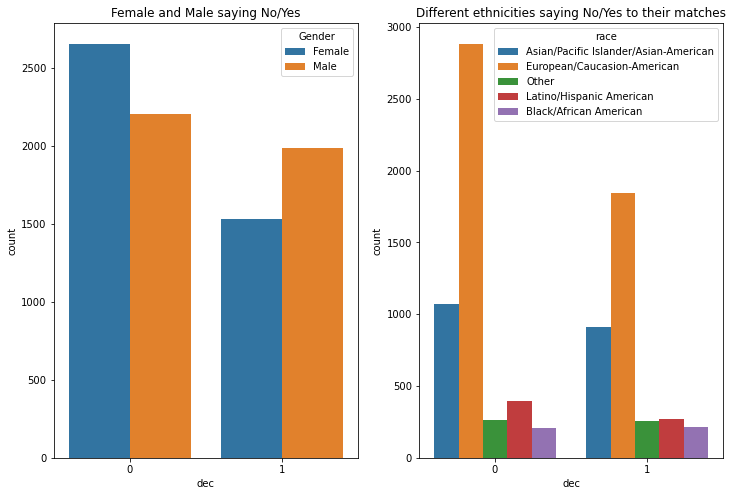

In [25]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=[12,8])
sns.countplot(data=data, hue ="Gender", x="dec", ax=ax1).set_title("Female and Male saying No/Yes");
sns.countplot(data=data, hue ="race", x="dec", ax=ax2).set_title("Different ethnicities saying No/Yes to their matches");

When looking at the following graphs, one can see that on average during the speedates more females said no than males, and more males said yes than females. One can also see that when looking at ethnicity, one's ethnic background does not necessarily correlate to their likelihood of saying yes or no to a date. 

In [26]:
cor=data.corr(method="spearman")
corr_target=abs(cor["partner rating of attributes"])
corr_target[corr_target>=0.50]

partner rating of attributes    1.000000
fun_o                           0.570183
like_o                          0.653525
Name: partner rating of attributes, dtype: float64

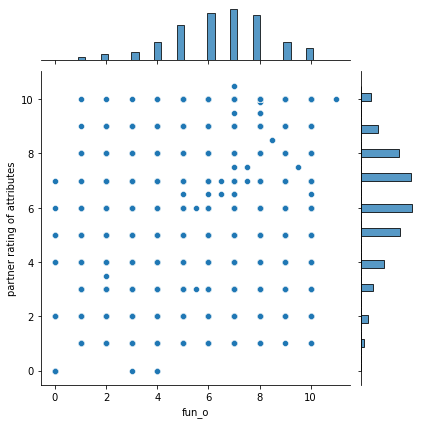

In [27]:
sns.jointplot(y="partner rating of attributes", x="fun_o", data=data);

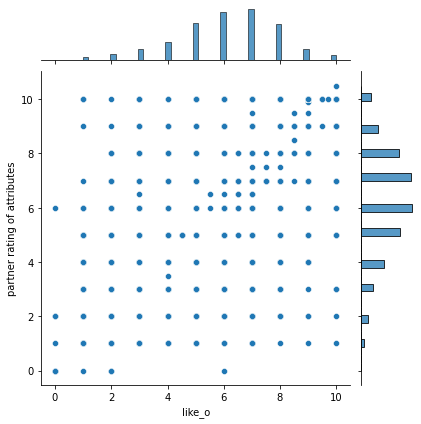

In [28]:
sns.jointplot(y="partner rating of attributes", x="like_o", data=data, );

After reviewing the given joinplots, one can see that the fun_o and like_o are evenly distributed, with both distributions looking almost identical. One can also see that the attribute fun_o is slightly less than that of like_o, with a difference between the two being 0.083342. 

<AxesSubplot:ylabel='iid'>

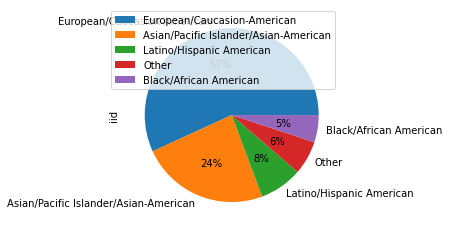

In [29]:
(data
    .groupby(["race"])
    [["match", "iid"]]
   .count()
    .sort_values("match", ascending=False)
    .head(100)).plot.pie(y="iid", autopct='%1.0f%%')

In [30]:
(
data
    .groupby(["field", "wave"])
    [["match"]]
   .count()
    .sort_values("match", ascending=False)
    .head(100)
)

,,match
field,wave,
MBA,14,138
International Affairs,9,120
Law,2,105
Social Work,4,90
Business,15,90
...,...,...
GS Postbacc PreMed,11,21
Mathematics,11,21
Art Education,11,21


<AxesSubplot:ylabel='None'>

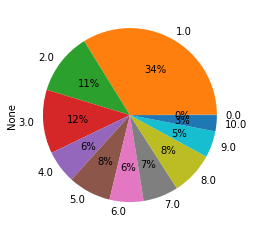

In [31]:
(data
 .groupby("race importance")
 .size()
).plot.pie(y="iid",autopct='%1.0f%%')

<AxesSubplot:ylabel='iid'>

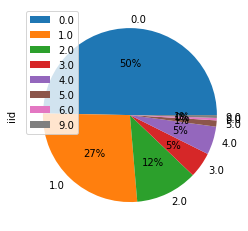

In [32]:
(data
.groupby("them_cal")
 .count()
).plot.pie(y="iid", autopct='%1.0f%%')


* 50% of participants did not receive calls from their matchers, 27% received only 1 call
* 62% of participants did not get any dates from the experiments
* Those who go out frequently got more matches
* 25% of people who go on a date twice a month, or several times a year got more matches
* People who had a goal to have a fan night out and meet new people got the most of the matches
* Religion and Race are not so important for matching


Overall, after reviewing many aspects of the dataset and the many conclusions that can be made therein, I can now say that prospective speed daters might be in for some good and bad news. When I went into this dataset analysis, I had assumed that for one to get a major amount of dates, they would have to do certain things right, and that many people left these speed dates optimistic giving many speed daters a copious amount of possible partners. This assumption while not entirely wrong, is very misleading. After conduction this dataset analysis, I have found that this speed dating scenario was not as beneficial for all those involved. When looking at the data, one can see that 50% of participants did not receive a call from their matches once they speed dating was over. With this in mind, only 27% of participants got one call, 12% got 2, and from there the pattern continued to dwindle. Sadly, when all was said and done, a total of 62% of participants did not get a date from this experiment, being much lower than my earlier assumptions. Although the overall dates from this experiment were lacking, one aspect of this analysis that is optimistic for prospective daters is the data from those that were able to get a date. When looking at those that were able to get call backs and dates, one can see that those that do speed dating more regularly, go out often, or keep a goal of having a fun night out to meet new people got the majority of matches. One can see from this analysis that 25% of people who went on a date several times a year got more matches than those who didn't. If one were to keep this in mind, they may have more success when joining the speed dating arena. For one's race or religion, one can see that neither really play a major role on their ability to get a date. With the majority of participants being caucasion nd asian, race played very little in the choice of many of the speed dates. For sex, one interesting peice of information would be that when speed dating, females were more liekly to say no during a date, whereas males were more liely to say yes during a date. With all this being said, for one to have a good time during a speed date and maximize their potential for future dates, all one must do is keep an open mind, go out more regularly, and simply just have a good time. 

Thank you.

-Morrison Fowlks. 